<a href="https://colab.research.google.com/github/Kevinouio/MSU-AI-Building-Classification/blob/main/Test_Model.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Mounted at /content/drive
Found 1 images belonging to 1 classes.
1/1 [==============================] - 1s 1s/step


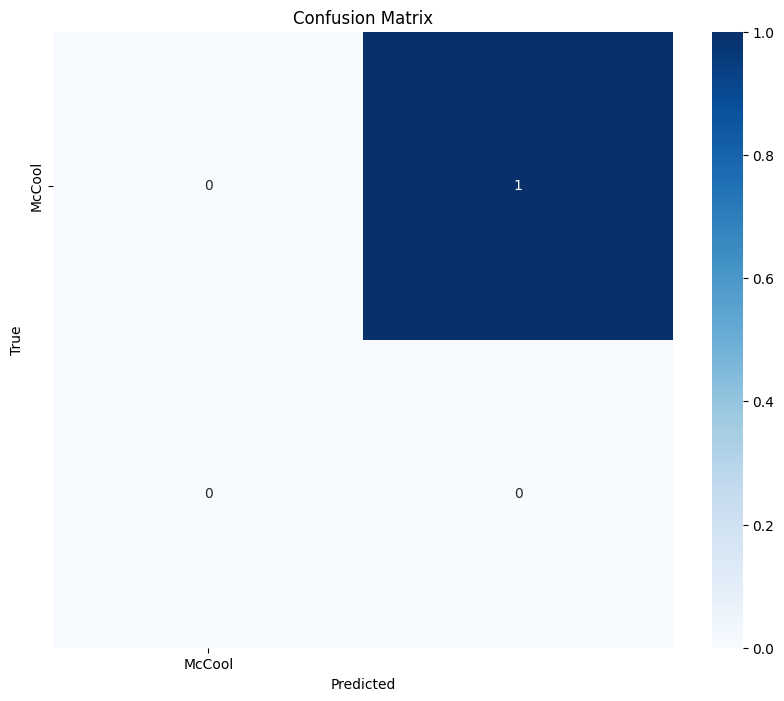

In [1]:
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt
import google.colab.drive as drive

# Must be run with a TPU

# Mount Google Drive
drive.mount('/content/drive')

# Define the path to your Google Drive folder
drive_folder = '/content/drive/MyDrive/'

# Load the trained model
model_path = "/content/drive/MyDrive/ModelsRes/model_epoch_17.h5"  # Path to your saved model
model = tf.keras.models.load_model(model_path)

# Define image dimensions and batch size
img_height, img_width = 512, 512  # Adjust based on your model input
batch_size = 256

# Load the test dataset without augmentation
test_datagen = ImageDataGenerator(rescale=1./255)

test_generator = test_datagen.flow_from_directory(
    '/content/drive/MyDrive/TestData',  # Path to your test dataset
    target_size=(img_height, img_width),
    batch_size=batch_size,
    class_mode='categorical',  # Change if using binary classification
    shuffle=False  # Important for confusion matrix
)

# Make predictions on the test set
predictions = model.predict(test_generator)
predicted_classes = tf.argmax(predictions, axis=1)

# Get true classes
true_classes = test_generator.classes

# Generate confusion matrix
cm = confusion_matrix(true_classes, predicted_classes)

# Plot confusion matrix
plt.figure(figsize=(10, 8))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=test_generator.class_indices.keys(),
            yticklabels=test_generator.class_indices.keys())
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()